In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv',index_col = 'DATE',parse_dates=True)
df = df.dropna()
print('Shape of the dataset',df.shape)
df.head()

Shape of the dataset (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<Axes: xlabel='DATE'>

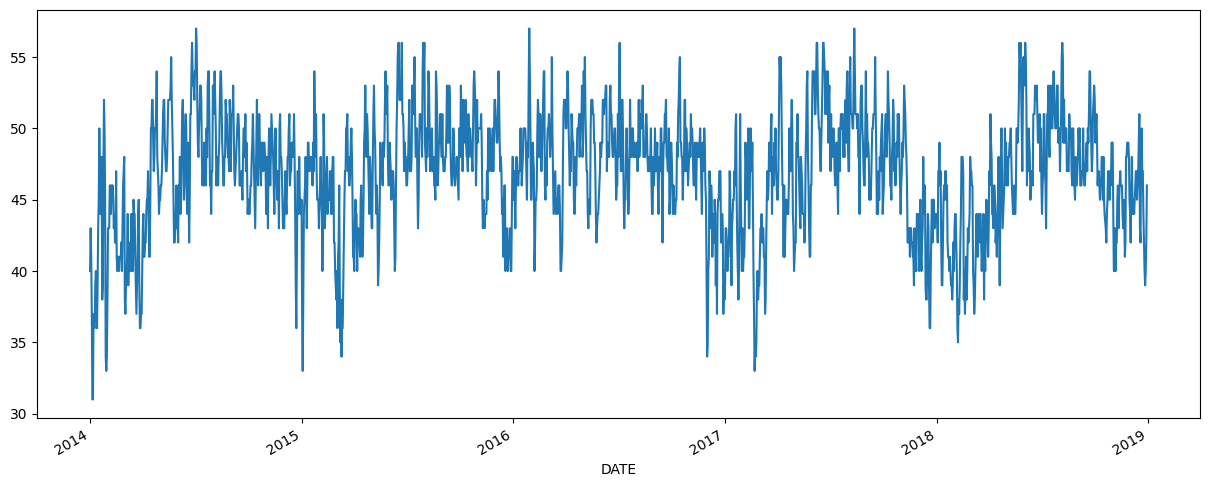

In [32]:
df['AvgTemp'].plot(figsize=(15,6))

In [33]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset,autolag='AIC')
  print("1.ADF",dftest[0])
  print("2.P VALUE",dftest[1])
  print("3.Number of Lags",dftest[2])
  print("4.Number of observations for ADF Regression and Critical Calculation",dftest[3])
  print("5.Critical Values")
  for key,val in dftest[4].items():
    print("\t",key,":",val)


In [34]:
ad_test(df['AvgTemp'])

1.ADF -6.554680125068777
2.P VALUE 8.675937480199653e-09
3.Number of Lags 12
4.Number of observations for ADF Regression and Critical Calculation 1808
5.Critical Values
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


In [35]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [36]:
stepwise_fit = auto_arima(df['AvgTemp'],suppress_warnings=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=5.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=7.80 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=9.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=10.55 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=4.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=8.94 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=5.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=10.04 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=6.02 sec
 ARIMA(1,0,4)(0,0,0)[0] inter

In [20]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Wed, 28 Aug 2024   AIC                           8295.034
Time:                        09:36:28   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [37]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [38]:
model = ARIMA(train['AvgTemp'],order=(1,0,5))
fittedmodel = model.fit()
fittedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 28 Aug 2024   AIC                           8156.395
Time:                        10:13:36   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
start = len(train)
end = len(train)+len(test)-1
pred = fittedmodel.predict(start=start,end=end,typ='levels')
pred.index = df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933418
2018-12-13    45.942808
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987769
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075922
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<Axes: xlabel='DATE'>

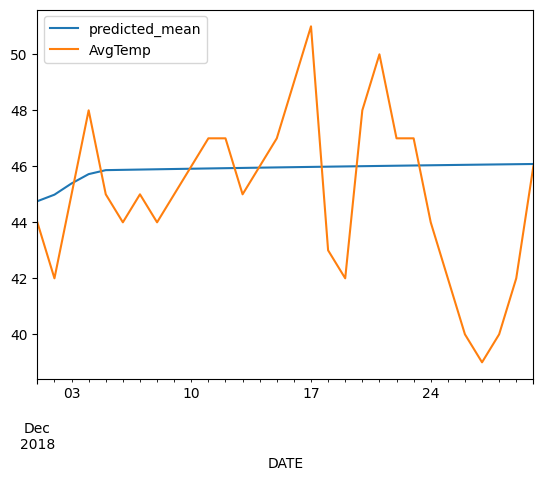

In [46]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [52]:
test['AvgTemp'].mean()

45.0

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463825206671


In [55]:
model2 = ARIMA(df['AvgTemp'],order=(1,0,5))
fittedmodel2 = model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [58]:
# prompt: print the predictions from 30-12-2018 to next 30 days

index_future_dates = pd.date_range(start='2018-12-30', end='2019-01-28')
pred = fittedmodel2.predict(start=len(df), end=len(df)+29, typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)


2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267394
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319591
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369628
2019-01-18    45.385842
2019-01-19    45.401830
2019-01-20    45.417593
2019-01-21    45.433137
2019-01-22    45.448462
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493165
2019-01-26    45.507651
2019-01-27    45.521934
2019-01-28    45.536017
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

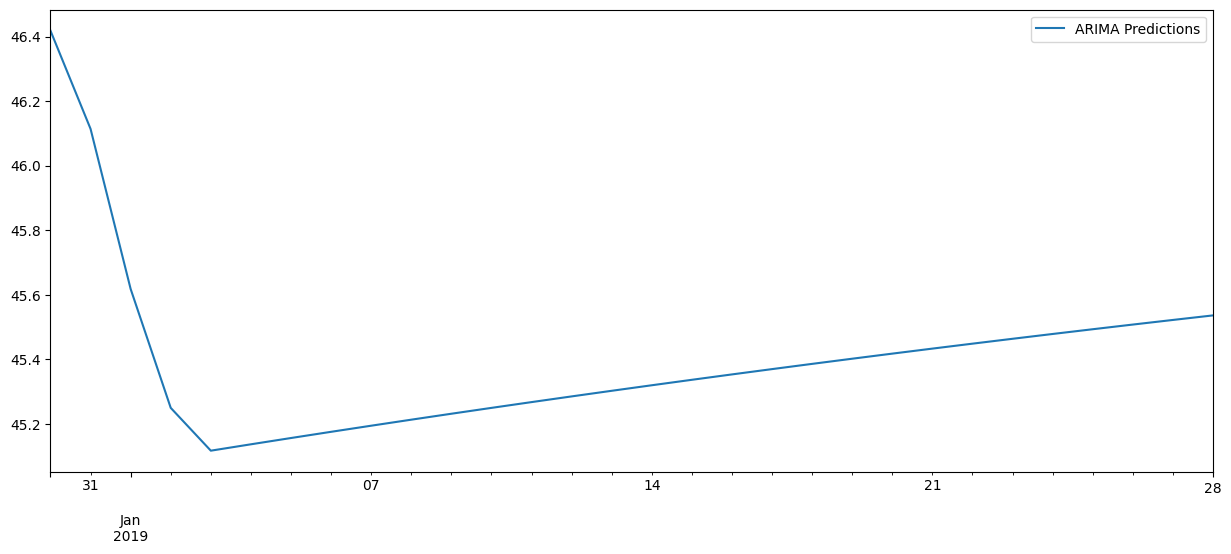

In [61]:
pred.plot(figsize=(15,6),legend=True)